

Top NEGATIVE tweets
id=Merkel is evil personified !!! Germany needs to get RID OF HER ASAP!!! @DerSPIEGEL  @Dana_Guth_AfD  @Dana_Guth_AfD… https://t.co/zXyVA8Ycdg, polarity=-1.00, clean=merkel is evil personified !!! germany needs to get rid of her asap!!! @derspiegel  @dana_guth_afd  @dana_guth_afd 
id=@sparks_rd Never called anyone against Brexit an idiot, I hate it!, polarity=-0.90, clean=@sparks_rd never called anyone against brexit an idiot, i hate it!
id=@MarieAnnUK We might all be idiots. Doesn't stop Brexit being utterly stupid though!, polarity=-0.90, clean=@marieannuk we might all be idiots. doesn't stop brexit being utterly stupid though!
id=@susanryland Idiots - Corbyn is pro Brexit - not a chancer, polarity=-0.80, clean=@susanryland idiots - corbyn is pro brexit - not a chancer
id=@jeremycorbyn @UKLabour BREXIT.Theres now so much bad news affecting working people along with proof that the leave… https://t.co/NGZQLxl4l4, polarity=-0.70, clean=@jeremycorbyn @uklabour brexi

the guys an utter 
id=Thanks, muppets. It’s this ‘clean break’ talk that’s fracturing our Single Market into UK vs EU and driving our pha… https://t.co/nBG4rR9IYn, polarity=0.17, clean=thanks, muppets. its this clean break talk that is fracturing our single market into uk vs eu and driving our pha 
id=The Brits were Lied to re. BREXIT. ! Hardly New News !, polarity=0.17, clean=the brits were lied to re. brexit. ! hardly new news !
id=Brexit laid bare..... Freshly Squeezed: Autumn Budget 2017 response https://t.co/LgHaEhPaOm, polarity=0.17, clean=brexit laid bare..... freshly squeezed: autumn budget 2017 response 
id=@DominicRaab Also clean analysis from same Mr. Shanker Singham, of The Legatum Institute?
https://t.co/EXJUveFsQU, polarity=0.18, clean=@dominicraab also clean analysis from same mr. shanker singham, of the legatum institute?

id=Irish are amazed at UK's faith in theoretical future free trade agreements. “Most real costs to cross-border busine… https://t.co/qTmTDjJqaY, pola

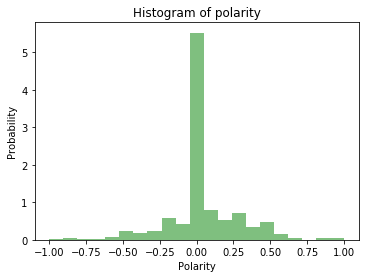

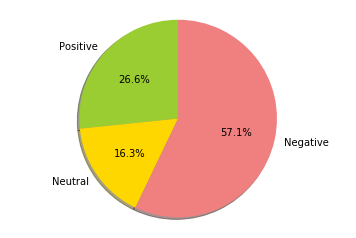

In [24]:
# Code adopted & adapted from the version provided by Stephen W. Thomas
# https://github.com/stepthom/textblob-sentiment-analysis

from textblob import TextBlob
import csv
import re
import operator
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Intialize an empty list for all tweets
tweets = []

# A helper function that removes all the non ASCII characters 
# from the given string. Retuns a string with only ASCII characters.
def strip_non_ascii(string):
    ''' Returns the string without non ASCII characters'''
    stripped = (c for c in string if 0 < ord(c) < 127)
    return ''.join(stripped)

# Load and clean data from the csv file 'Brexit_.csv

with open('Brexit_.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        tweet= dict()
        tweet['tweet_text'] = row[5]

        # Ignore retweets
        if re.match(r'^RT.*', tweet['tweet_text']):
            continue

        tweet['clean'] = tweet['tweet_text']

        # Remove all non-ascii characters
        tweet['clean'] = strip_non_ascii(tweet['clean'])

        # Normalize case
        tweet['clean'] = tweet['clean'].lower()

        # Remove URLS
        tweet['clean'] = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', tweet['clean'])

        # Fix classic tweet lingo (adopted from the source code)
        tweet['clean'] = re.sub(r'\bthats\b', 'that is', tweet['clean'])
        tweet['clean'] = re.sub(r'\bive\b', 'i have', tweet['clean'])
        tweet['clean'] = re.sub(r'\bim\b', 'i am', tweet['clean'])
        tweet['clean'] = re.sub(r'\bya\b', 'yeah', tweet['clean'])
        tweet['clean'] = re.sub(r'\bcant\b', 'can not', tweet['clean'])
        tweet['clean'] = re.sub(r'\bwont\b', 'will not', tweet['clean'])
        tweet['clean'] = re.sub(r'\bid\b', 'i would', tweet['clean'])
        tweet['clean'] = re.sub(r'wtf', 'what the fuck', tweet['clean'])
        tweet['clean'] = re.sub(r'\bwth\b', 'what the hell', tweet['clean'])
        tweet['clean'] = re.sub(r'\br\b', 'are', tweet['clean'])
        tweet['clean'] = re.sub(r'\bu\b', 'you', tweet['clean'])
        tweet['clean'] = re.sub(r'\bk\b', 'OK', tweet['clean'])
        tweet['clean'] = re.sub(r'\bsux\b', 'sucks', tweet['clean'])
        tweet['clean'] = re.sub(r'\bno+\b', 'no', tweet['clean'])
        tweet['clean'] = re.sub(r'\bcoo+\b', 'cool', tweet['clean'])
        
        # Create textblob object
        tweet['TextBlob'] = TextBlob(tweet['clean'])

        tweets.append(tweet)

# DEVELOP MODELS

for tweet in tweets:
    tweet['polarity'] = float(tweet['TextBlob'].sentiment.polarity)
    tweet['subjectivity'] = float(tweet['TextBlob'].sentiment.subjectivity)

    if tweet['polarity'] >= 0.1:
        tweet['sentiment'] = 'positive'
    elif tweet['polarity'] <= -0.1:
        tweet['sentiment'] = 'negative'
    else:
        tweet['sentiment'] = 'neutral'

tweets_sorted = sorted(tweets, key=lambda k: k['polarity'])

# EVALUATE RESULTS

# First, print out a few example tweets from each sentiment category.

print("\n\nTop NEGATIVE tweets")
negative_tweets = [d for d in tweets_sorted if d['sentiment'] == 'negative']
for tweet in negative_tweets[0:100]:
    print("id=%s, polarity=%.2f, clean=%s" % (tweet['tweet_text'], tweet['polarity'], tweet['clean']))

print("\n\nTop POSITIVE tweets")
positive_tweets = [d for d in tweets_sorted if d['sentiment'] == 'positive']
for tweet in positive_tweets[-100:]:
    print("id=%s, polarity=%.2f, clean=%s" % (tweet['tweet_text'], tweet['polarity'], tweet['clean']))

print("\n\nTop NEUTRAL tweets")
neutral_tweets = [d for d in tweets_sorted if d['sentiment'] == 'neutral']
for tweet in neutral_tweets[0:500]:
    print("id=%s, polarity=%.2f, clean=%s" % (tweet['tweet_text'], tweet['polarity'], tweet['clean']))


# VISUALISE RESULTS

# A histogram of the scores.
x = [d['polarity'] for d in tweets_sorted]
num_bins = 21
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Probability')
plt.title(r'Histogram of polarity')
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()


# A pie chart showing the number of tweets in each sentiment category
pos = len(positive_tweets)
neu = len(negative_tweets)
neg = len(neutral_tweets)
labels = 'Positive', 'Neutral', 'Negative'
sizes = [pos, neu, neg]
colors = ['yellowgreen', 'gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()